/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloaded imagenet_class_index.json


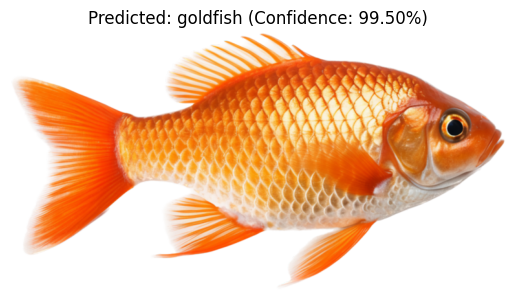

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from PIL import Image
import json
import requests
import os

model = models.alexnet(pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x[:3, :, :]),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

imagenet_json_path = 'imagenet_class_index.json'
if not os.path.exists(imagenet_json_path):
    url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
    response = requests.get(url)
    with open(imagenet_json_path, 'w') as f:
        class_names = [line.strip() for line in response.text.splitlines()]
        class_idx = {str(i): [str(i), class_names[i]] for i in range(len(class_names))}
        json.dump(class_idx, f)
        print(f"Downloaded {imagenet_json_path}")

with open(imagenet_json_path) as f:
    class_idx = json.load(f)

def get_class_name(idx):
    return class_idx[str(idx)][1]

def predict_image_and_display(image_path, model):
    img = Image.open(image_path)
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)

    with torch.no_grad():
        output = model(img_tensor)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_class_idx = torch.argmax(probabilities).item()
    confidence = probabilities[predicted_class_idx].item()

    class_name = get_class_name(predicted_class_idx)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_name} (Confidence: {confidence*100:.2f}%)")
    plt.show()

image_path = '/content/fish-with-ai-generated-free-png.webp'
predict_image_and_display(image_path, model)
